Задача 2. Сравнение методов классификации

Левков Данил Андреевич (22.М05)

Выполнил задачи:
- Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров. - файл functions.py
- Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блакнот с анализом этих данных можно найти тут.
- Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
- Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
- Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
- Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
* (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.

* Взять данные для предсказания заболеваний сердца (целевой признак для предсказания --- target)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

In [2]:
df = pd.read_csv('data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Описание датасета:
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Проверка на наличие выбросов

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Чистка данных не трубуется

* Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

In [6]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Целевой признак является бинарным

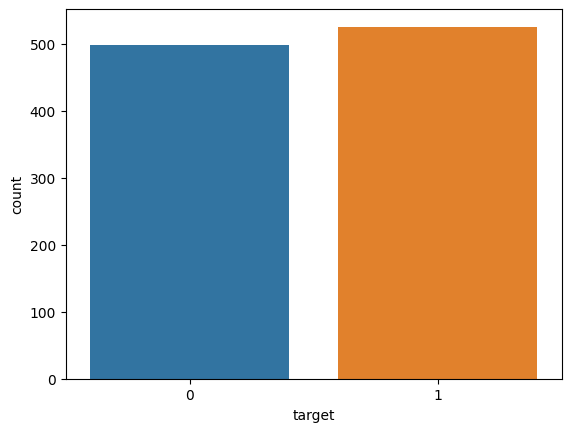

In [7]:
sns.countplot(x="target", data=df)
plt.show()

Наблюдается небольшой перевес в сторону больных людей.
Далее рассмотрим усредненную картину по каждому признаку.

In [8]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


Заметим следующие особенности:
* средний возраст, артериальное давление, уровень холестирина и сахара, частота сердцебиения практически не отличаются для больных и здоровых
* наличие заболевания чаще встречается у мужчин
* у здоровых чаще возникает стенокардия и ST depression при нагрузках
* у больных меньше ярко выраженных сосудов

Теперь рассмотрим признаки по отдельности
1) Возраст

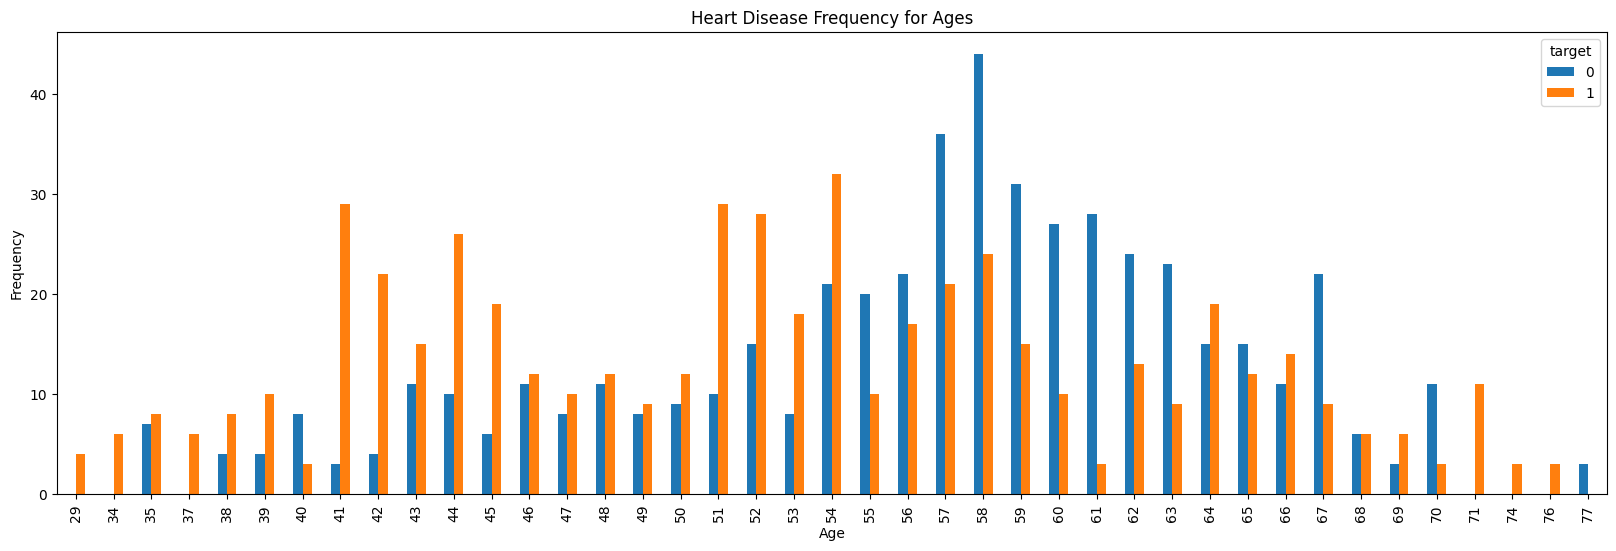

In [9]:
crosstab = pd.crosstab(df.age,df.target)
crosstab.plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

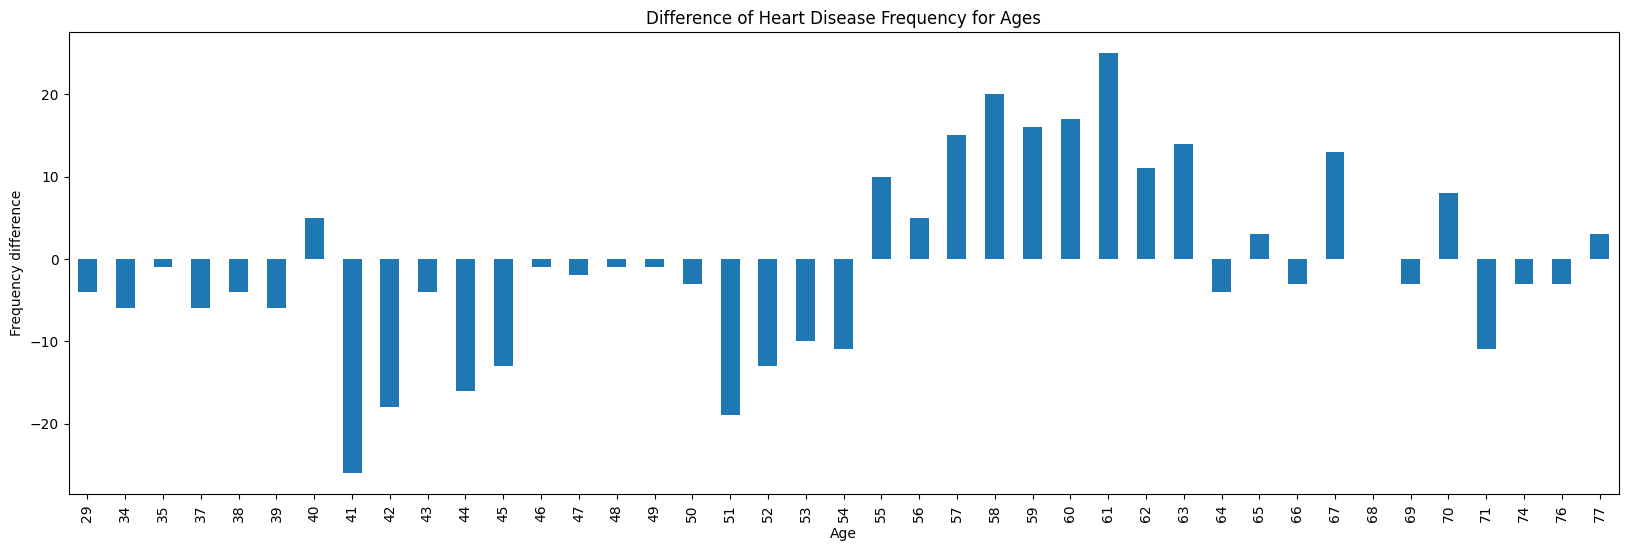

In [10]:
age_duff = crosstab[0] - crosstab[1] 
age_duff.plot(kind="bar", figsize=(20, 6))
plt.title('Difference of Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency difference')
plt.show()

Видим, что максимальное количество заболеваний приходится на воздаст от 41 до 54 лет. При этом максимальный перевес достигается в 41 и 51 год. В то же время, период с 55 до 63 лет характеризуется большим количеством здоровых людей, что может быть связано с высокой смертностью от сердечных заболеваний до 50 лет.

2) тип грудной боли (категориальный)

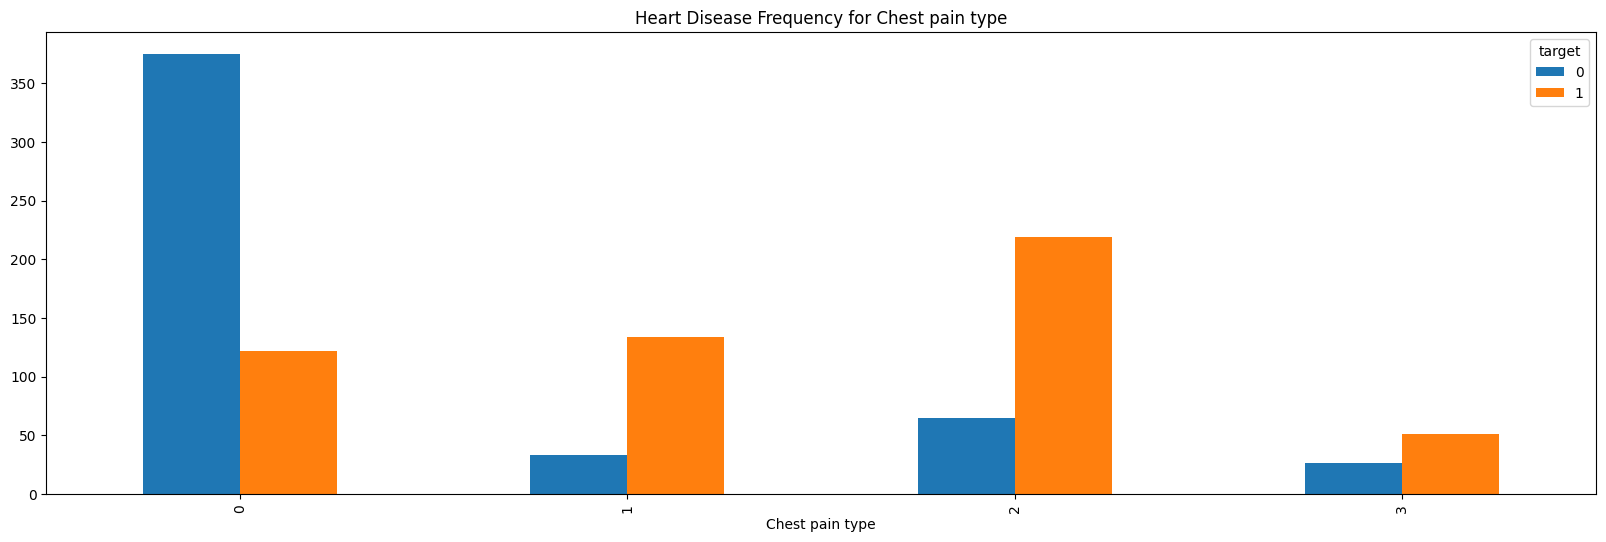

In [11]:
pd.crosstab(df['cp'], df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Chest pain type')
plt.xlabel('Chest pain type')
plt.show()

Люди с нулевой категорией боли намного реже оказываются подвержены заболеванию. А типы боли 1 и 2 чаще встречаются именно у больных людей.

3) oldpeak vs slope

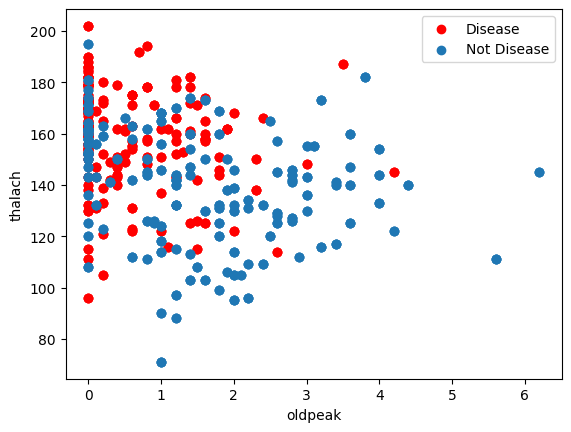

In [12]:
plt.scatter(x=df.oldpeak[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.oldpeak[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("oldpeak")
plt.ylabel("thalach")
plt.show()

Из графика видно, что люди с заболеваниями встречаются реже при высоком (и ненулевом) ST depression и частоте сердечных сокращений. И в пространстве этих двух параметров можно провести прямую, достаточно хорошо разделяющую классы.

* При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering)

Предшествующий анализ показывает, что некоторые признаки, скорее всего окажутся незначимыми. Отсеим их, используя RFE, в качестве оценщика выберем Дерево Решений

In [13]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=9)

X = df.drop(['target'], axis=1)
y = df['target']

rfe = rfe.fit(X, y)

In [14]:
SelectedCols = frozenset(X.columns[rfe.support_])
DeletedCols = [item for item in X.columns if item not in SelectedCols]
print(DeletedCols)

['fbs', 'restecg', 'exang', 'slope']


Самыми неинформативными оказались признаки 'fbs', 'restecg', 'exang', 'slope', уберем их из нашей выборки.

In [15]:
X = X[X.columns[rfe.support_]]
X.head()

,age,sex,cp,trestbps,chol,thalach,oldpeak,ca,thal
0,52,1,0,125,212,168,1.0,2,3
1,53,1,0,140,203,155,3.1,0,3
2,70,1,0,145,174,125,2.6,0,3
3,61,1,0,148,203,161,0.0,1,3
4,62,0,0,138,294,106,1.9,3,2


Преобразуем оставшиеся категориальные признаки в количественные

In [16]:
cp_dum = pd.get_dummies(X['cp'], prefix = "cp")
thal_dum = pd.get_dummies(X['thal'], prefix = "thal")
frames = [X, cp_dum, thal_dum]
X = pd.concat(frames, axis = 1)
X = X.drop(columns = ['cp', 'thal'])
X.head()

,age,sex,trestbps,chol,thalach,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,2,1,0,0,0,0,0,0,1
1,53,1,140,203,155,3.1,0,1,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,1,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,1,1,0,0,0,0,0,0,1
4,62,0,138,294,106,1.9,3,1,0,0,0,0,0,1,0


* Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.

In [17]:
np.linspace(0.00001, 0.01, 4)

array([1.00e-05, 3.34e-03, 6.67e-03, 1.00e-02])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from functions import LogisticRegressionCalculator

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

best_accuracy = 0

for alpha in [0.01, 0.0001, 0.000001]:
    for iter_num in [10, 100, 10000]:
        myCalculator = LogisticRegressionCalculator(alpha=alpha, max_iteration_num=iter_num)
        myCalculator.fit(x=X_train, y=y_train)
        accur = accuracy_score(y_test, myCalculator.predict_yes_no(X_test))
        print(accur)
        if  best_accuracy < accur:
            best_alpha = alpha
            best_iter_num = iter_num
            best_accuracy = accur


C:\Users\stude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by z

0.4708171206225681
0.4708171206225681


C:\Users\stude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.4708171206225681
0.622568093385214
0.6848249027237354
0.7198443579766537
0.5291828793774319
0.5719844357976653
0.6848249027237354


In [19]:
print("Best alpha: ", best_alpha)
print("Best iterations number: ", best_iter_num)
print("Best accuracy: ", best_accuracy)

Best alpha:  0.0001
Best iterations number:  10000
Best accuracy:  0.7198443579766537


Так как модель ошибается в 25% случаев, попытаемся улучшить результат с помощью масштабирования.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


stdScaler = StandardScaler()

X_train_scaled = stdScaler.fit_transform(X_train)
X_test_scaled = stdScaler.transform(X_test)

myCalculator = LogisticRegressionCalculator(alpha=best_alpha, max_iteration_num=best_iter_num)
myCalculator.fit(x=X_train_scaled, y=y_train)
accur = accuracy_score(y_test, myCalculator.predict_yes_no(X_test_scaled))
cm_my_lr = confusion_matrix(y_test, myCalculator.predict_yes_no(X_test_scaled))

print("Accuracy on scaled data: ", accur)

Accuracy on scaled data:  0.867704280155642


Результат значительно улучшился!
Не останавливаясь на достигнутом, выполним кросс-валидацию

In [21]:
from sklearn.model_selection import KFold

splitter = KFold(n_splits=4)
X_scaled = pd.DataFrame(stdScaler.fit_transform(X))

result_accur = []

for train_index, test_index in splitter.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    myCalculator = LogisticRegressionCalculator(alpha=alpha, max_iteration_num=iter_num)
    myCalculator.fit(x=X_train, y=y_train)
    accur = accuracy_score(y_test, myCalculator.predict_yes_no(X_test))
    result_accur.append(accur)

print("Accuracy mean by 4 opinions: ", np.mean(result_accur))

Accuracy mean by 4 opinions:  0.8497271704766537


В итоге получили 85% стабильной точности

* Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).

In [22]:
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

1) logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("model", LogisticRegression())])

parameters = {
  'model__solver':['newton-cg', 'lbfgs', 'liblinear'],
  'model__max_iter': [1000, 10000]
  }

grid_pipeline = GridSearchCV(pipeline, parameters, cv=4)
grid_pipeline.fit(X_train, y_train)
accur = accuracy_score(y_test, grid_pipeline.predict(X_test))
cm_lr = confusion_matrix(y_test, grid_pipeline.predict(X_test))
print("Accuracy of LogisticRegression: ", accur)
print("Best params: ", grid_pipeline.best_params_)

Accuracy of LogisticRegression:  0.8326848249027238
Best params:  {'model__max_iter': 1000, 'model__solver': 'newton-cg'}


2) svm

In [24]:
from sklearn.svm import SVC

pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("model", SVC())])

parameters = {
  'model__C': [0.001, 0.1, 10],
  'model__kernel': ['poly', 'sigmoid'],
  'model__coef0': [0.5, 0.05]
  }

grid_pipeline = GridSearchCV(pipeline, parameters, cv=4)
grid_pipeline.fit(X_train, y_train)
accur = accuracy_score(y_test, grid_pipeline.predict(X_test))
cm_svc = confusion_matrix(y_test, grid_pipeline.predict(X_test))
print("Accuracy of SVC: ", accur)
print("Best params: ", grid_pipeline.best_params_)

Accuracy of SVC:  0.9260700389105059
Best params:  {'model__C': 10, 'model__coef0': 0.05, 'model__kernel': 'poly'}


3) knn

In [25]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("model", KNeighborsClassifier())])

parameters = {
  'model__n_neighbors': [2, 5, 10],
  'model__weights': ['uniform', 'distance'],
  'model__algorithm': ['ball_tree', 'kd_tree', 'brute']
  }

grid_pipeline = GridSearchCV(pipeline, parameters, cv=4)
grid_pipeline.fit(X_train, y_train)
accur = accuracy_score(y_test, grid_pipeline.predict(X_test))
cm_knn = confusion_matrix(y_test, grid_pipeline.predict(X_test))
print("Accuracy of KNeighborsClassifier: ", accur)
print("Best params: ", grid_pipeline.best_params_)

Accuracy of KNeighborsClassifier:  0.9649805447470817
Best params:  {'model__algorithm': 'ball_tree', 'model__n_neighbors': 5, 'model__weights': 'distance'}


4) naive bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("model", GaussianNB())])

parameters = {
  'model__var_smoothing': [1e-9, 0.00001, 0.01]
  }

grid_pipeline = GridSearchCV(pipeline, parameters, cv=4)
grid_pipeline.fit(X_train, y_train)
accur = accuracy_score(y_test, grid_pipeline.predict(X_test))
cm_nb = confusion_matrix(y_test, grid_pipeline.predict(X_test))
print("Accuracy of GaussianNB: ", accur)
print("Best params: ", grid_pipeline.best_params_)

Accuracy of GaussianNB:  0.8443579766536965
Best params:  {'model__var_smoothing': 0.01}


5) decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("model", DecisionTreeClassifier())])

parameters = {
  'model__criterion': ['gini','entropy','log_loss'],
  'model__splitter': ['best','random'],
  'model__max_depth': [3,5,10],
  }

grid_pipeline = GridSearchCV(pipeline, parameters, cv=4)
grid_pipeline.fit(X_train, y_train)
accur = accuracy_score(y_test, grid_pipeline.predict(X_test))
cm_dt = confusion_matrix(y_test, grid_pipeline.predict(X_test))
print("Accuracy of DecisionTreeClassifier: ", accur)
print("Best params: ", grid_pipeline.best_params_)

Accuracy of DecisionTreeClassifier:  0.9961089494163424
Best params:  {'model__criterion': 'log_loss', 'model__max_depth': 10, 'model__splitter': 'best'}


* Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

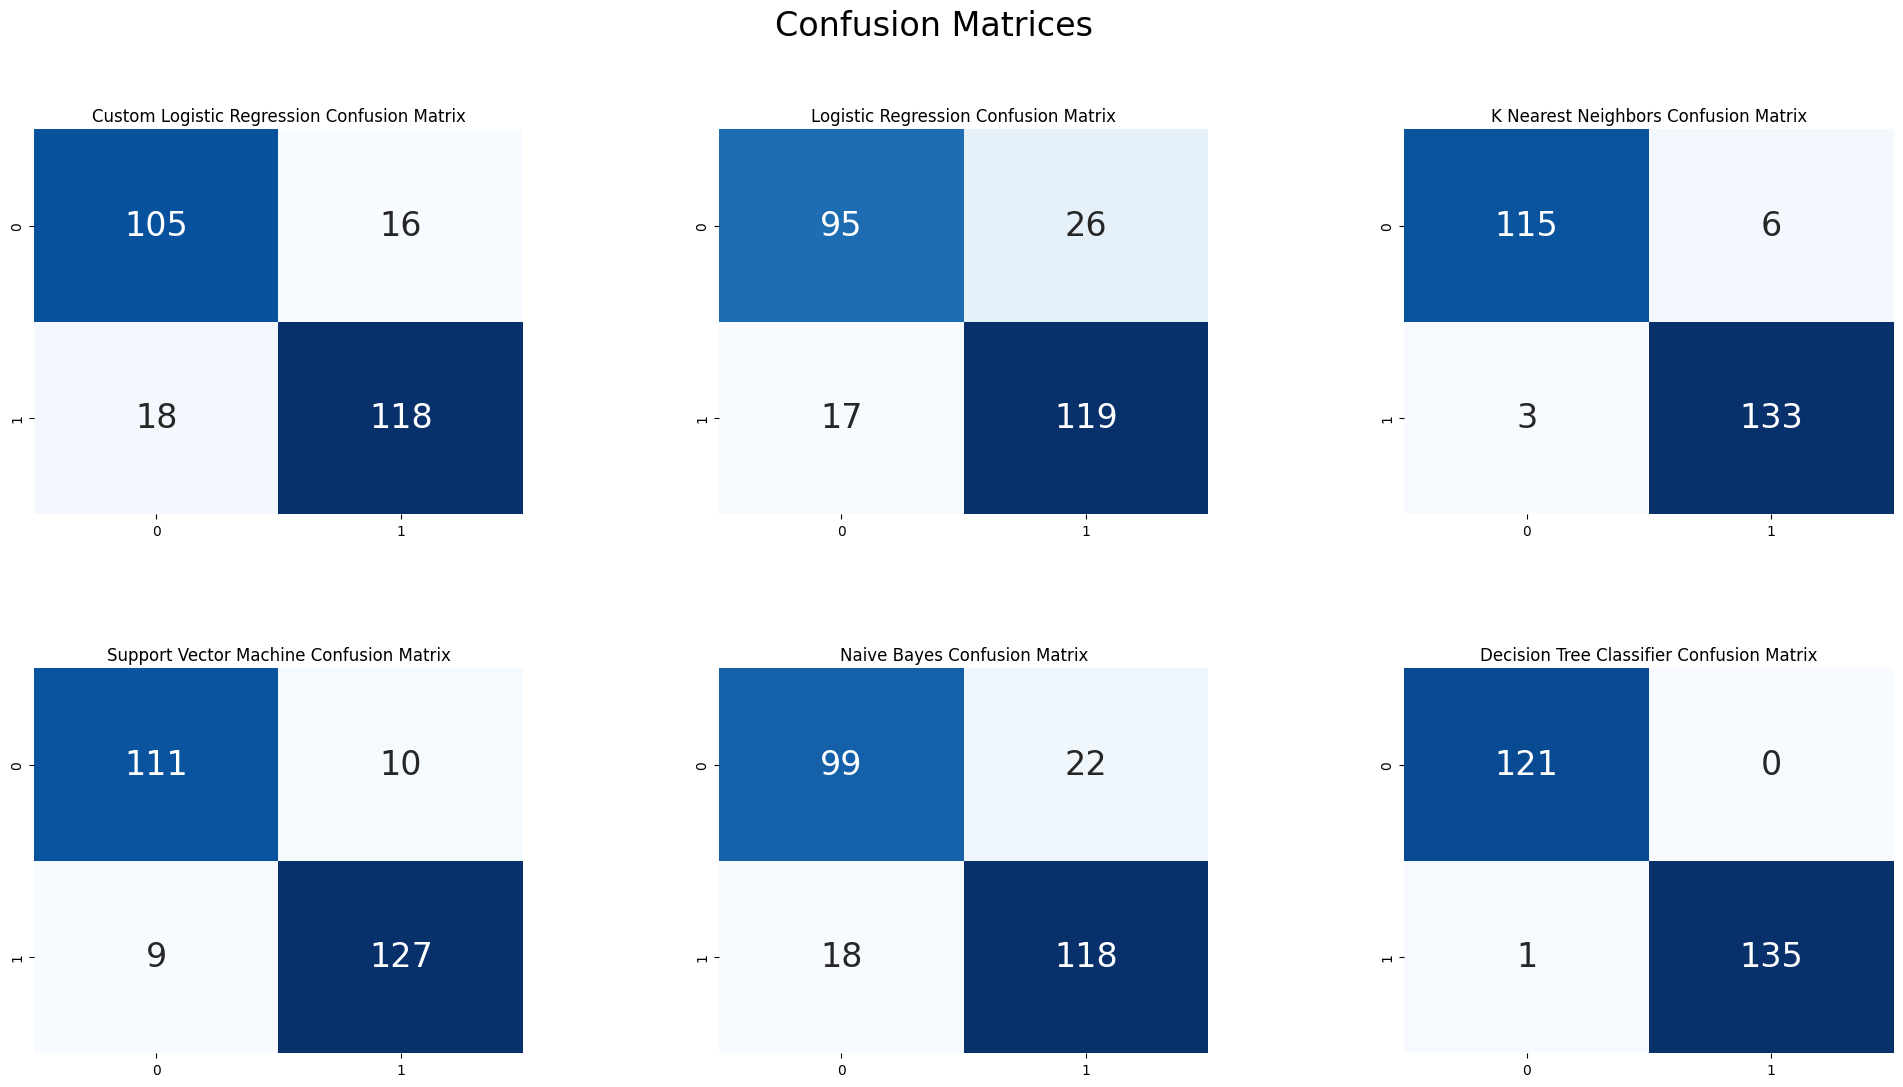

In [28]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Custom Logistic Regression Confusion Matrix")
sns.heatmap(cm_my_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Таким образом, собственная модель, обученная на отмасштабированных данных показала даже несколько лучший результат чем библиотечная.
Лучше всего на текущих данных показали себя метод ближайших соседей и дерево решений.

* Дополнительное задание 1 (+2 балла). Реализовать еще один из методов классификации и добавить его в сравнение.

In [29]:
from functions import KNNCalculator

Подпор гиперпараметров

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

best_accuracy = 0

for k in [3, 5, 20]:
    for method in ['distance', 'uniform']:
        myCalculator = KNNCalculator(n_neighbors=k, weights=method)
        myCalculator.fit(X_train, y_train)
        accur = accuracy_score(y_test, myCalculator.predict(X_test))
        if  best_accuracy < accur:
            best_n_neighbors = k
            best_weights = method
            best_accuracy = accur
print("Best accuracy of Custom KNN: ", best_accuracy)
print("Best n_neighbors", best_n_neighbors)
print("Best weights", best_weights)

c:\Users\stude\PROG\ML labs\2 lab\functions.py:71: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, indx] = X.iloc[:, indx] * self.weights[indx]


Best accuracy of Custom KNN:  0.8949416342412452
Best n_neighbors 3
Best weights distance


Модель показала очень неплохой результат. При этом, использование скалирования расстояния для каждого признака является преимущественным

In [49]:
calc = KNNCalculator(n_neighbors=3, weights='distance')
calc.fit(X_train, y_train)
cm_my_knn_1 = confusion_matrix(y_test, calc.predict(X_test))

In [60]:
calc = KNNCalculator(n_neighbors=5)
calc.fit(X_train, y_train)
cm_my_knn_2 = confusion_matrix(y_test, calc.predict(X_test))

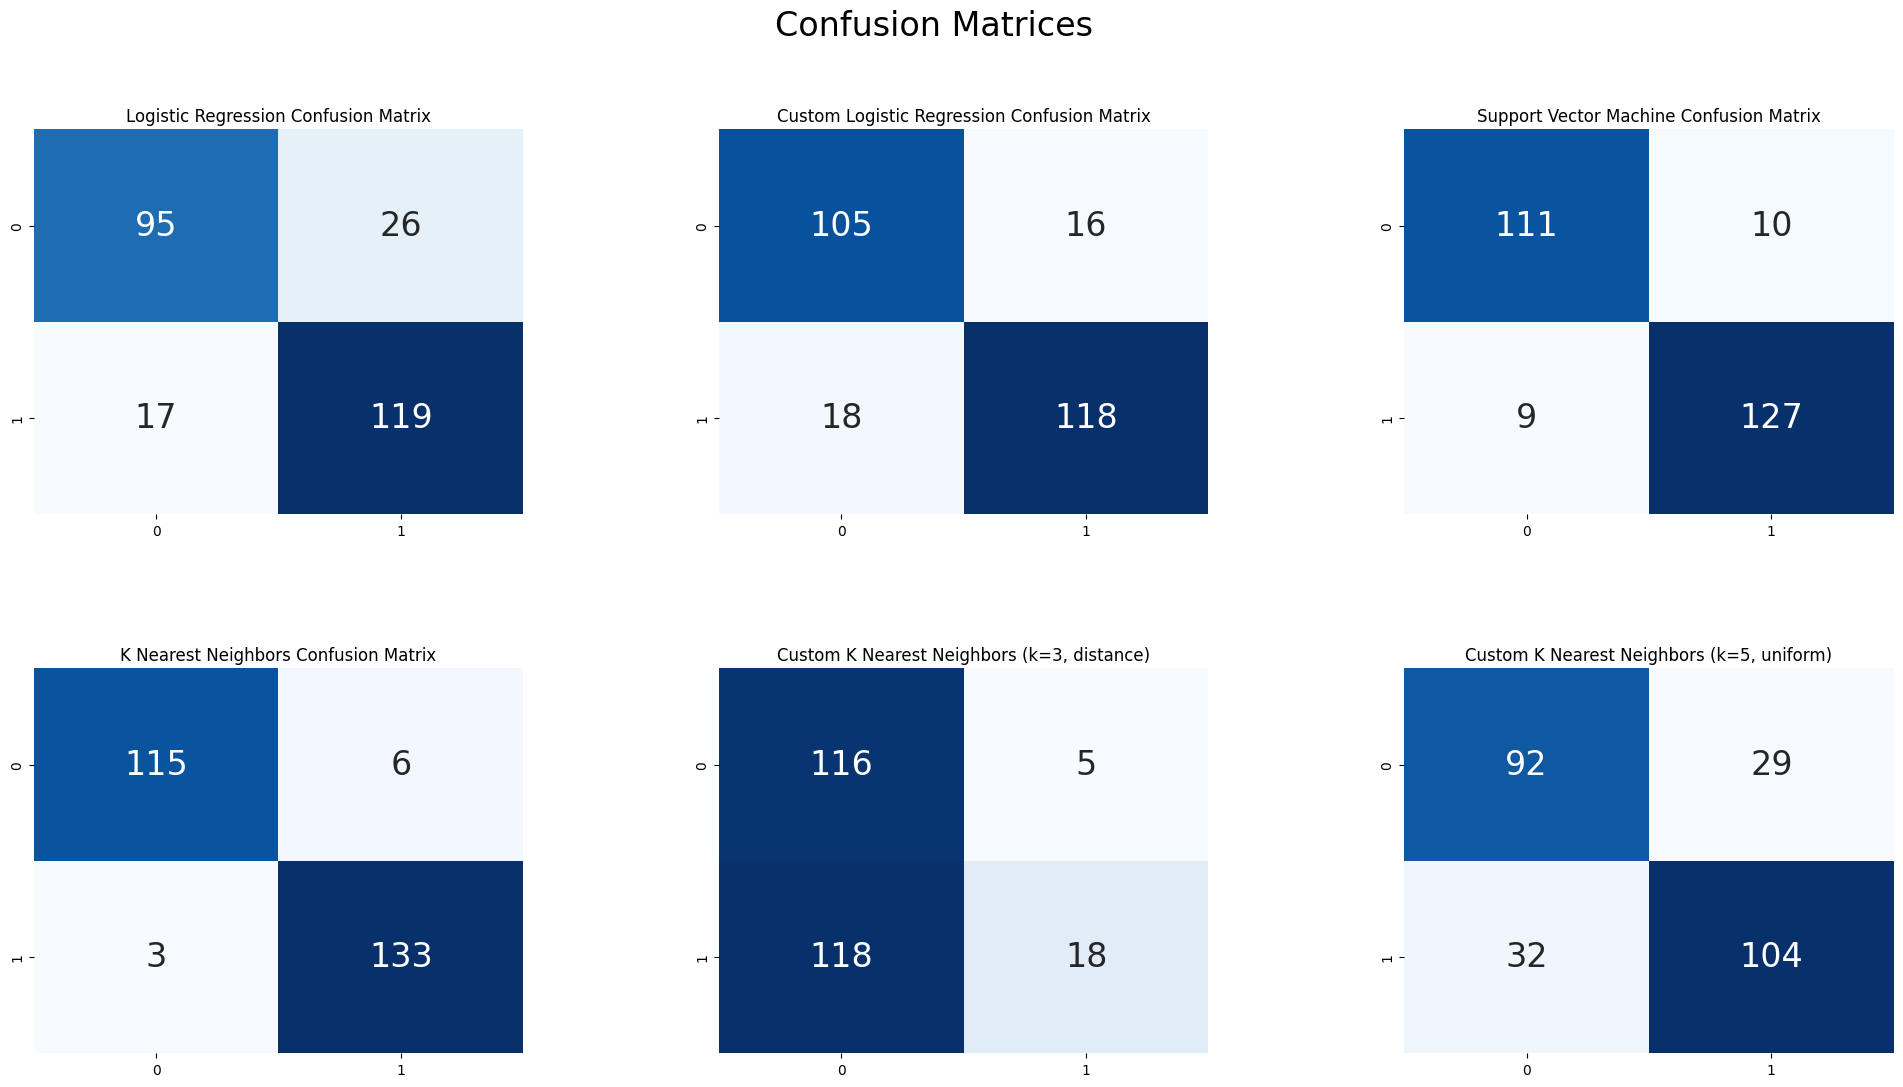

In [61]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Custom Logistic Regression Confusion Matrix")
sns.heatmap(cm_my_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Custom K Nearest Neighbors (k=3, distance)")
sns.heatmap(cm_my_knn_1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Custom K Nearest Neighbors (k=5, uniform)")
sns.heatmap(cm_my_knn_2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Интересно замтить, что не смотря на то, что параметры {n_neighbors=3, weights='distance'} дают большее значение метрики точности (accuracy_score), и тем не менее при них модель является плохо обученной, так как дает много ложно-положительных ответов. Это можно видеть на графике выше - 118 промахов против 18 попаданий.